<a href="https://colab.research.google.com/github/Nsi20/Cuisine-Classification/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# TASK 3**

# **Cuisine Classification**

**Objective: Develop a machine learning model to classify restaurants based on their cuisines**.

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('Dataset  (1).csv')

data.head()


Saving Dataset  (1).csv to Dataset  (1).csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


1. **Preprocess the dataset by handling missing values and encoding categorical variables.**

 - **Handling Missing Values**

In [3]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

print("Missing values after handling:\n", data.isnull().sum())


Missing values per column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values after handling:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now

 - **Encoding Categorical Variables**

In [4]:
categorical_columns = data.select_dtypes(include=['object']).columns

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data_encoded.head()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name_#Dilliwaala6,Restaurant Name_#InstaFreeze,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,False,False,...,False,False,False,False,False,True,False,False,False,False
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,False,False,...,True,False,False,False,False,False,False,False,False,True
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,False,False,...,False,False,False,False,False,True,False,False,False,False
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,False,False,...,False,False,False,False,False,True,False,False,False,False


- # **Split the data into training and testing sets.**

In [5]:
from sklearn.model_selection import train_test_split

# Defining the target variable (for this example, let's assume it's 'Aggregate rating')
X = data_encoded.drop(columns=['Aggregate rating'])
y = data_encoded['Aggregate rating']

# Spliting the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7640, 20829) (7640,)
Testing set shape: (1911, 20829) (1911,)


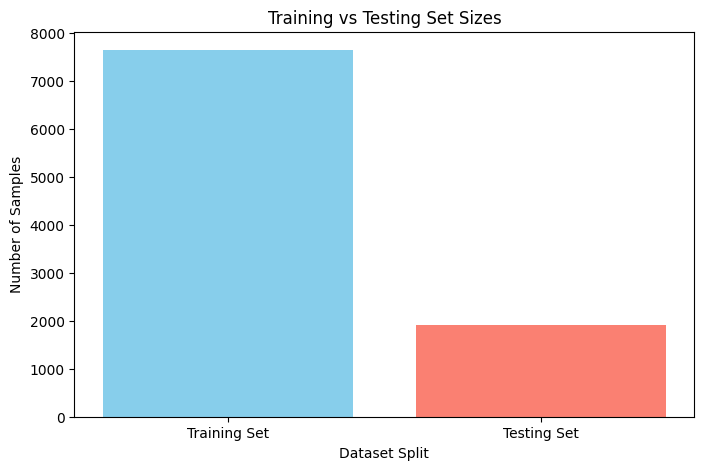

In [6]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

# Plotting the split as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Training Set', 'Testing Set'], [train_size, test_size], color=['skyblue', 'salmon'])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.title('Training vs Testing Set Sizes')
plt.show()


# **Select a classification algorithm (e.g., logistic regression, random forest) and train it on the training data.**

 - **Converting Ratings to Categories**

In [9]:
# Defining bins and labels for classification
# Adjusting bin edges and labels based on your data distribution
bins = [0, 2, 4, 5]  # Example: Low (0-2), Medium (2-4), High (4-5)
labels = ['Low', 'Medium', 'High']

# Creating a new categorical target variable
y = pd.cut(data_encoded['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)


 - **Spliting the Data into Training and Testing Sets**

In [10]:
from sklearn.model_selection import train_test_split

# Performing the train-test split
X = data_encoded.drop(columns=['Aggregate rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 - **Training a Classification Model**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the training set and calculate accuracy
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.999869109947644


 - # **Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall) on the testing data.**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predicting on the testing set
test_predictions = model.predict(X_test)

# Calculating classification metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Displaying the metrics
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, test_predictions))


Testing Accuracy: 0.9733124018838305
Testing Precision: 0.9760161379830454
Testing Recall: 0.9733124018838305
Testing F1 Score: 0.9740352814561616

Classification Report:
               precision    recall  f1-score   support

        High       0.84      0.97      0.90       230
         Low       1.00      1.00      1.00       422
      Medium       0.99      0.97      0.98      1259

    accuracy                           0.97      1911
   macro avg       0.94      0.98      0.96      1911
weighted avg       0.98      0.97      0.97      1911



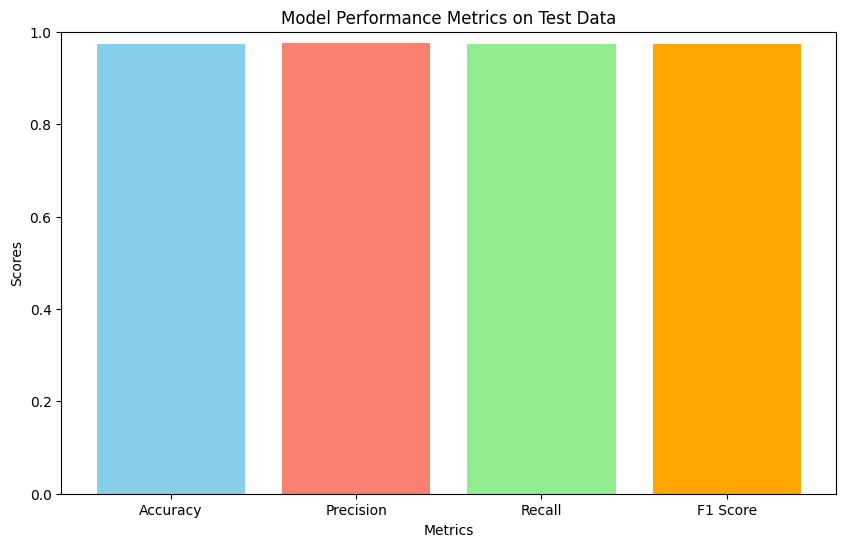

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [test_accuracy, test_precision, test_recall, test_f1]

# Plotting the metrics as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for easier interpretation
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Metrics on Test Data')
plt.show()


 - # **Analyze the model's performance across different cuisines and identify any challenges or biases.**

- **Grouping Data by Cuisine and Evaluate Model Performance**

In [16]:
# Filtering columns to find those related to cuisines
cuisine_columns = [col for col in X_test.columns if 'Cuisines_' in col]
print("Cuisine-related columns:", cuisine_columns)


Cuisine-related columns: ['Cuisines_Afghani, Mughlai, Chinese', 'Cuisines_Afghani, North Indian', 'Cuisines_Afghani, North Indian, Pakistani, Arabian', 'Cuisines_African', 'Cuisines_African, Portuguese', 'Cuisines_American', 'Cuisines_American, Asian, Burger', 'Cuisines_American, Asian, European, Seafood', 'Cuisines_American, Asian, Italian, Seafood', 'Cuisines_American, Asian, North Indian, Mexican, South Indian', 'Cuisines_American, BBQ', 'Cuisines_American, BBQ, Burger', 'Cuisines_American, BBQ, Sandwich', 'Cuisines_American, BBQ, Seafood', 'Cuisines_American, BBQ, Southern', 'Cuisines_American, BBQ, Steak', 'Cuisines_American, Bakery, European, Burger, Fusion', 'Cuisines_American, Bar Food', 'Cuisines_American, Bar Food, BBQ', 'Cuisines_American, Bar Food, Sandwich', 'Cuisines_American, Breakfast', 'Cuisines_American, Breakfast, Burger', 'Cuisines_American, Breakfast, Desserts', 'Cuisines_American, Breakfast, Diner', 'Cuisines_American, Breakfast, Greek', 'Cuisines_American, Breakf

 - **Evaluating Performance per Cuisine Column**

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize dictionary to store metrics
cuisine_metrics = {}

for cuisine_col in cuisine_columns:
    # Filtering test data for this cuisine (only rows where this cuisine column is 1)
    X_cuisine = X_test[X_test[cuisine_col] == 1]
    y_cuisine = y_test[X_test[cuisine_col] == 1]

    if not X_cuisine.empty:
        # Predictions
        cuisine_predictions = model.predict(X_cuisine)

        # Calculating metrics for this cuisine
        report = classification_report(y_cuisine, cuisine_predictions, output_dict=True)
        cuisine_metrics[cuisine_col] = {
            'accuracy': accuracy_score(y_cuisine, cuisine_predictions),
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall'],
            'f1-score': report['weighted avg']['f1-score']
        }

# Converting to DataFrame for easier visualization
cuisine_metrics_df = pd.DataFrame(cuisine_metrics).T
cuisine_metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

,accuracy,precision,recall,f1-score
Cuisines_American,1.0,1.0,1.0,1.0
"Cuisines_American, Asian, European, Seafood",1.0,1.0,1.0,1.0
"Cuisines_American, BBQ",1.0,1.0,1.0,1.0
"Cuisines_American, BBQ, Burger",1.0,1.0,1.0,1.0
"Cuisines_American, BBQ, Southern",1.0,1.0,1.0,1.0
...,...,...,...,...
"Cuisines_Tibetan, Chinese",1.0,1.0,1.0,1.0
"Cuisines_Tibetan, Fast Food",1.0,1.0,1.0,1.0
"Cuisines_Turkish, Arabian, Middle Eastern",1.0,1.0,1.0,1.0
Cuisines_Unknown,1.0,1.0,1.0,1.0


 - **Visualizing Performance by Cuisine**

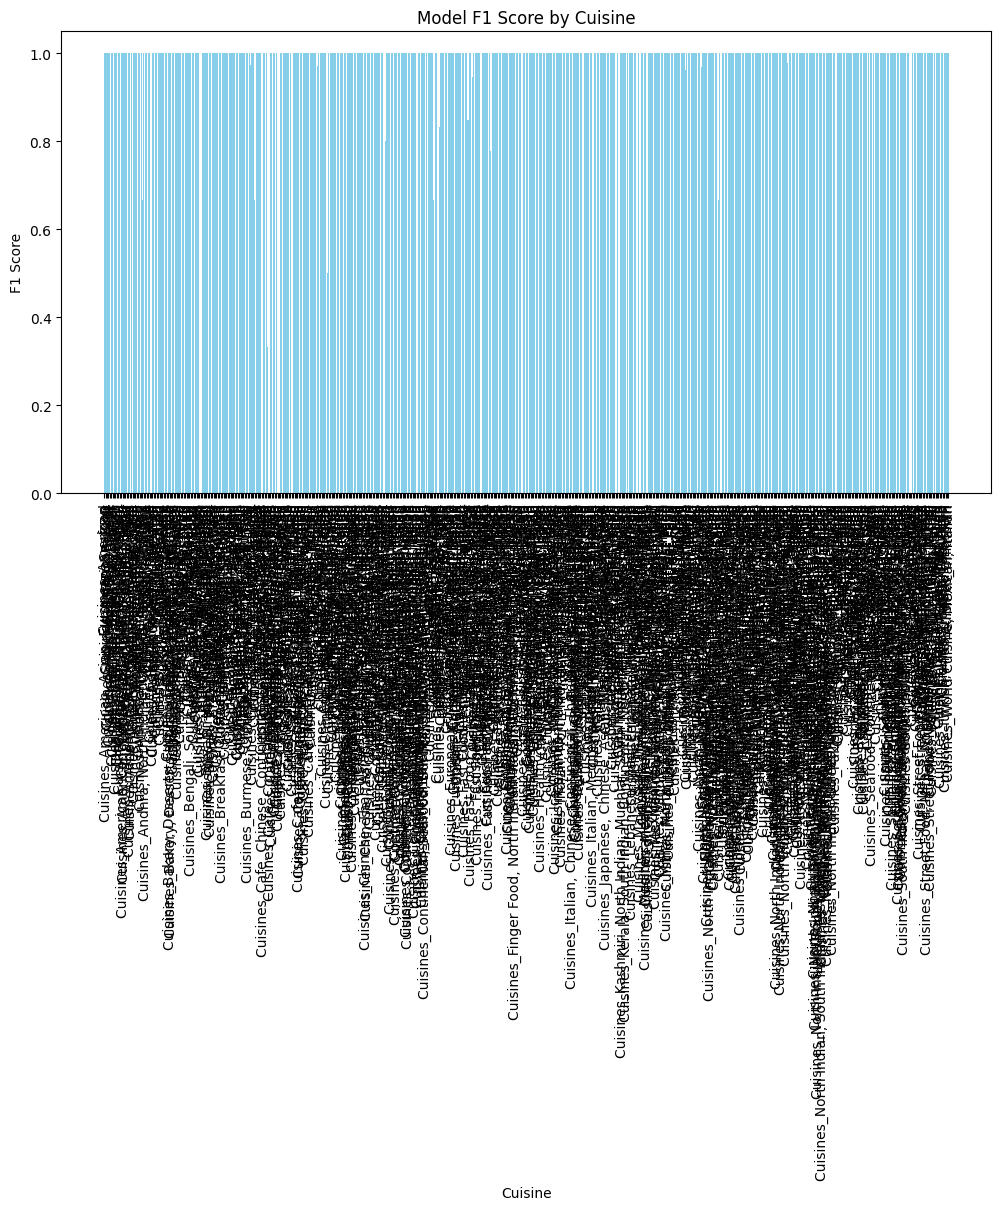

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(cuisine_metrics_df.index, cuisine_metrics_df['f1-score'], color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('F1 Score')
plt.title('Model F1 Score by Cuisine')
plt.xticks(rotation=90)
plt.show()
